__Notes taken from Sebastian Reschka & Vahid Mirjalili textbook__

## Tensorflow Keras API (tf.keras)

- high-level NN API providing user-friendly and modular programming interfacse
- In Tensorflow 2.0, tf.keras has become the primary and recommended approach for implementing models
- tf.keras makes building NN models extremely easy using the tf.keras.Sequential() that allows stacking layers to form a network
- models built with tf.keras API can be compiled and trained via the .compile() and .fit() methods

__Building a linear regression model__

In [2]:
import numpy as np
X_train = np.arange(10).reshape((10,1))

y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

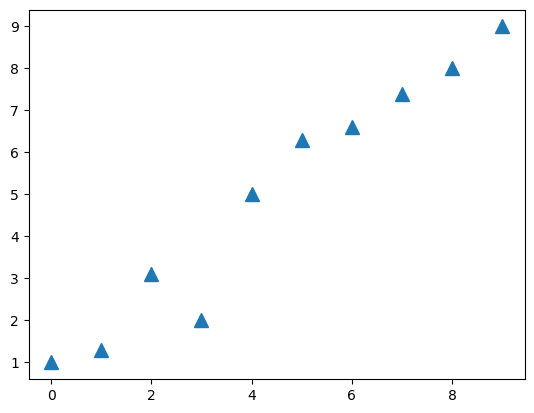

In [3]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, '^', ms=10.0)
plt.show()

In [5]:
import tensorflow as tf
# Normalize the data
X_train_std = (X_train-np.mean(X_train))/np.std(X_train)

ds_train_orig = tf.data.Dataset.from_tensor_slices(
                (tf.cast(X_train_std, tf.float32),
                tf.cast(y_train, tf.float32)))

In [8]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')
    def call(self, x):
        return self.w*x+self.b
    
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

In [10]:
# Model training via .compile() and .fit()

num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1

tf.random.set_seed(1)
model=MyModel()

model.compile(optimizer='sgd',
             loss=loss_fn, 
             metrics=['mae','mse'])

model.fit(X_train_std, y_train, epochs = num_epochs, 
         batch_size=batch_size, verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 2ms/step - loss: 27.8723 - mae: 4.5654 - mse: 27.8723
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 18.6586 - mae: 3.7446 - mse: 18.6586
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 12.5239 - mae: 3.0454 - mse: 12.5239
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 8.4670 - mae: 2.4907 - mse: 8.4670
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 5.7632 - mae: 2.0567 - mse: 5.7632
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 3.9697 - mae: 1.7232 - mse: 3.9697
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 2.7766 - mae: 1.4752 - mse: 2.7766
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.9861 - mae: 1.2578 - mse: 1.9861
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 1.4572 - mae: 1.0978 - mse: 1.4572
Epoch 10/200
10/10 [==

10/10 [==============================] - 0s 3ms/step - loss: 0.4136 - mae: 0.4939 - mse: 0.4136
Epoch 77/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4139 - mae: 0.4824 - mse: 0.4139
Epoch 78/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4136 - mae: 0.4811 - mse: 0.4136
Epoch 79/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4137 - mae: 0.4854 - mse: 0.4137
Epoch 80/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4136 - mae: 0.4842 - mse: 0.4136
Epoch 81/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4139 - mae: 0.4923 - mse: 0.4139
Epoch 82/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4137 - mae: 0.4861 - mse: 0.4137
Epoch 83/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4135 - mae: 0.4913 - mse: 0.4135
Epoch 84/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4139 - mae: 0.4861 - mse: 0.4139
Epoch 85/200
10/10 [============

10/10 [==============================] - 0s 2ms/step - loss: 0.4140 - mae: 0.4936 - mse: 0.4140
Epoch 151/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4139 - mae: 0.4885 - mse: 0.4139
Epoch 152/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4139 - mae: 0.4876 - mse: 0.4139
Epoch 153/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4133 - mae: 0.4937 - mse: 0.4133
Epoch 154/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4140 - mae: 0.4925 - mse: 0.4140
Epoch 155/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4135 - mae: 0.4933 - mse: 0.4135
Epoch 156/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4139 - mae: 0.4902 - mse: 0.4139
Epoch 157/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4136 - mae: 0.4907 - mse: 0.4136
Epoch 158/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4130 - mae: 0.4830 - mse: 0.4130
Epoch 159/200
10/10 [===

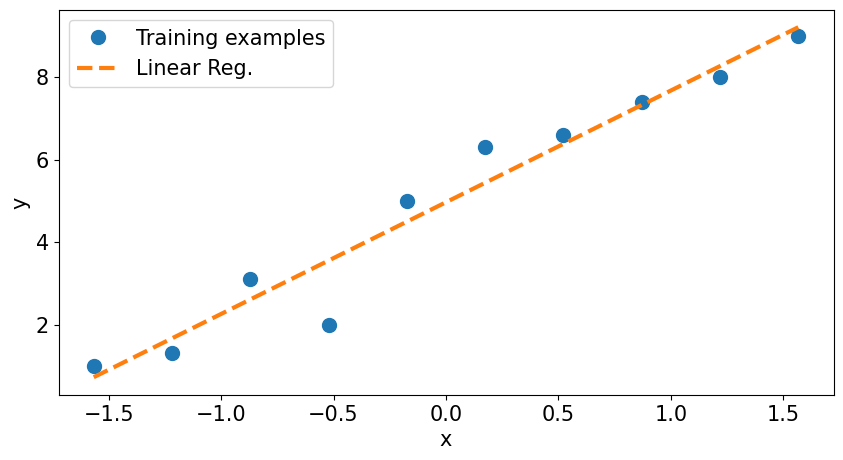

In [16]:
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X_train_std, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [22]:
import tensorflow_datasets as tfds

iris, iris_info = tfds.load("iris", with_info=True)
print(iris_info)

tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.1.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_dir='/home/rat42/tensorflow_datasets/iris/2.1.0',
    file_format=tfrecord,
    download_size=3.65 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=float32),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('features', 'label'),
    disable_shuffling=False,
    splits={
        'train': <Spl

In [23]:
tf.random.set_seed(1)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

# Use the .take() and .skip() method to split datasets

ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

print(type(ds_train_orig))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [24]:
# use .map() to convert dictionary into a tuple

ds_train_orig = ds_train_orig.map(
            lambda x: (x['features'], x['label']))

ds_test = ds_test.map(
            lambda x: (x['features'], x['label']))

In [26]:
# Create a NN model using keras

iris_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='sigmoid',
                    name='fc1', input_shape=(4,)),
        tf.keras.layers.Dense(3, name='fc2',
                             activation='softmax')
])

iris_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Why 'softmax' activation in output layer? multi-class classification problem

- Compile the model to specify model details

In [27]:
iris_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy')

In [28]:
num_epochs=100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size/batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)

history = iris_model.fit(ds_train, epochs = num_epochs,
                       steps_per_epoch=steps_per_epoch,
                       verbose=0)

 'history' variable keeps the training loss and accuracy after each epoch. Let us visualize that.

In [31]:
hist = history.history
print(type(hist))

<class 'dict'>


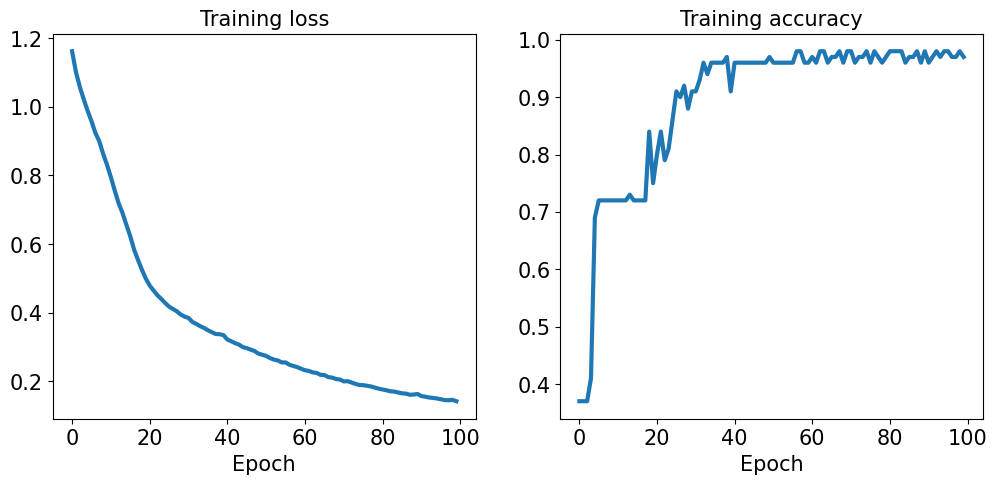

In [32]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)

ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

Let us test the model on the test dataset

In [33]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print('Total loss: {:.4f} Test Acc.:{:.4f}'.format(*results))

Total loss: 0.1465 Test Acc.:0.9600


In [35]:
# Saving and reloading the trained model
iris_model.save('iris-classifier.h5', overwrite='True',
               include_optimizer=True, save_format='h5')

In [37]:
# Reload the save model
iris_model_reloaded = tf.keras.models.load_model('iris-classifier.h5')

# Let us make sure that the model was correctly saved and reloaded
results = iris_model_reloaded.evaluate(ds_test.batch(50), verbose=0)
print('Total loss: {:.4f} Test Acc.:{:.4f}'.format(*results))


Total loss: 0.1465 Test Acc.:0.9600


## Choosing activation functions for multilayer NN

- Linear activation (Adaline): nov very useful for both hidden and activation layers since we want to introduce non-linearity in NN to tackle complex problems
- Most common is the sigmoid logistic function
    - $\sigma(z) = \frac{1}{1+e^{-z}}$
    - Problematic if inputs are << 0, because then the output $\approx$ 0.0
    - 0 output from sigmoid will make NN learn very slowly and likely to get trapped in a local minima during training
    - people prefer h-tangent as activation in hidden layers

### Logistic function recap
- Net input: z = $w_0x_0+w_1x_1+.......+w_mx_m = \sum_{i=0}^{m}w_ix_i = w^Tx$
- $\phi_{logistic}$(z) = $\frac{1}{1+e^{-z}}$

- $w_0$ is the bias unit and thus $x_0=1$
- Let us look at binary classification first

In [41]:
import numpy as np

X = np.array([1, 1.4, 3.5])    # first value must be 1
w = np.array([0.3, 0.1, 0.6])

def net_input(X,w):
    return np.dot(X,w)

def logistic(z):
    return 1.0/(1.0+np.exp(-z))

def logistic_activation(X,w):
    z = net_input(X,w)
    return logistic(z)

print("P(y=1|x) = %.3f" % logistic_activation(X,w))

P(y=1|x) = 0.927


- 92.7% probability that the sample with the features X and weights w belongs to the positive class. 
- everything is simple to understand

- How about multi-class classification?

In [43]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

A = np.array([[1, 0.1, 0.4, 0.6]])

Z = np.dot(W, A[0])
y_proba = logistic(Z)
print("Net input: \n", Z)
print('Output Units: \n', y_proba)

Net input: 
 [1.78 0.76 1.65]
Output Units: 
 [0.85569687 0.68135373 0.83889105]


- Output values cannot be interpreted as probabilities as they do not sum up to 1
- Creating meaningful probabilities for multiclass predictions using _softmax_ function
- $p(z) = \frac{e^{Z_i}}{\sum^M_{j=1}e^{Z_j}}$
## Multi-class probabilities using softmax

In [45]:
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))
y_proba = softmax(Z)
print("Class Probabilities: \n", y_proba)

Class Probabilities: 
 [0.44668973 0.16107406 0.39223621]


## Broadening output spectrum using a hyperbolic tangent

- $\phi_{logistic}$(z) = $\frac{1}{1+e^{-z}}$
- $\phi_{tanh}$(z) = $2\times\phi_{logistic}(2z) -1 = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$
- has a borader spectrum (-1,1) compared to logistic function (0,1) and can improve the convergence of back-propagation algorithm

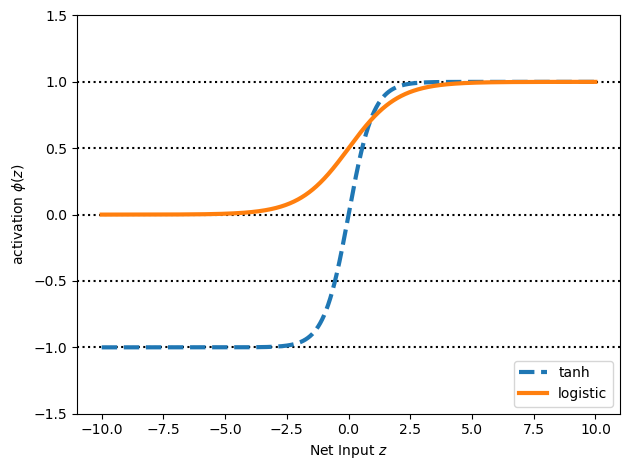

In [47]:
def tanh(z):
    e_p = np.exp(z)
    e_n = np.exp(-z)
    return (e_p-e_n)/(e_p+e_n)

z = np.arange(-10,10, 0.005)

log_act = logistic(z)
# tanh_act = tanh(z)
tanh_act = tf.keras.activations.tanh(z)
plt.ylim([-1.5,1.5])
plt.xlabel('Net Input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,linewidth=3, linestyle='--',label='tanh')
plt.plot(z, log_act,linewidth=3,label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## Vanishing gradient problems of _tanh_ and _logistic_ activations

- due to asymptotic behavior of tanh function, larger values of net input (z) give the same tanh activation (output)
- derivative of tanh activations wrt the net input diminishes as z becomes large
- learning weights during training becomes very slow because the gradient terms are very close to zero
- Way around this problem?

## ReLU activation

In [51]:
tanh(np.arange(1,30.0))

array([0.76159416, 0.96402758, 0.99505475, 0.9993293 , 0.9999092 ,
       0.99998771, 0.99999834, 0.99999977, 0.99999997, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

### Mathematical Definition
$\phi(z) = max(0,z)$